In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('dress_review.csv')
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


## Removing unnecessary features 

In [4]:
df = df.drop(['s.no', 'clothing_id'], axis=1)
df.head()

,age,division_name,department_name,class_name,title,review_text,alike_feedback_count,rating,recommend_index
0,40,General,Bottoms,Jeans,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,62,General Petite,Tops,Blouses,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,47,General Petite,Bottoms,Skirts,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,45,General Petite,Bottoms,Pants,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,37,Initmates,Intimate,Swim,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [5]:
df.describe

<bound method NDFrame.describe of        age   division_name department_name class_name  \
0       40         General         Bottoms      Jeans   
1       62  General Petite            Tops    Blouses   
2       47  General Petite         Bottoms     Skirts   
3       45  General Petite         Bottoms      Pants   
4       37       Initmates        Intimate       Swim   
...    ...             ...             ...        ...   
23481   44  General Petite         Dresses    Dresses   
23482   39         General         Dresses    Dresses   
23483   29  General Petite            Tops      Knits   
23484   57         General         Dresses    Dresses   
23485   56         General         Jackets    Jackets   

                                       title  \
0                       Amazing fit and wash   
1                         Lovely and unique!   
2                                        Meh   
3                                        Wow   
4                     Great for bigger bu

## Setting Fonts

In [21]:
# Setting Fonts
xfont = {'family': 'serif',
'color': 'k',
'weight': 'bold',
'size': 12,
}
yfont = {'family': 'serif',
'color': 'k',
'weight': 'bold',
'size': 12,
}
title_font = {'family': 'serif',
'color': 'k',
'weight': 'bold',
'size': 14,
'style':'normal'
}
legend_prop = {
'weight':'semibold',
'size':12,
'style':'italic'
}
highlight = {
'family': 'serif',
'color': 'darkviolet',
'weight': 'bold',
'size': 12,
}


### Data Preparation: The code begins with data in a DataFrame, which contains information about clothing items, including attributes such as age, division name, department name, class name, and more. In this specific analysis, the code is interested in items that received the highest rating, which is 5.

## List out only top ratings 

### Data Filtering: The code filters the original DataFrame (df) to create a new DataFrame called dftoprating. This new DataFrame contains only the rows where the 'rating' column is equal to 5, effectively selecting items with the top rating.

In [22]:
df['rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

In [23]:
dftoprating=df.loc[(df['rating']==5)]
dftoprating

,age,division_name,department_name,class_name,title,review_text,alike_feedback_count,rating,recommend_index
0,40,General,Bottoms,Jeans,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,62,General Petite,Tops,Blouses,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
3,45,General Petite,Bottoms,Pants,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,37,Initmates,Intimate,Swim,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
6,83,General,Tops,Sweaters,Beautiful and unique.,Love this sweater!\r\nsoft and cozy and the ru...,4,5,1
...,...,...,...,...,...,...,...,...,...
23481,44,General Petite,Dresses,Dresses,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,39,General,Dresses,Dresses,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,29,General Petite,Tops,Knits,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,57,General,Dresses,Dresses,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1


### Counting Categories: The value_counts() method is applied to the 'class_name' column of the dftoprating DataFrame. This method counts how many times each unique class name appears in the DataFrame. In this context, it's counting the number of items in each class name category that received a top rating of 5.

In [24]:
toprating=dftoprating['class_name'].value_counts()
toprating


Dresses           3397
Knits             2589
Blouses           1686
Pants              816
Sweaters           810
Jeans              729
Fine gauge         646
Skirts             544
Jackets            451
Lounge             405
Swim               197
Shorts             183
Outerwear          180
Sleep              142
Legwear            104
Intimates           96
Layering            89
Trend               52
Casual bottoms       1
Name: class_name, dtype: int64

### Data Visualisation 

###### Data Visualization: The data is now ready for visualization. The code proceeds to create a bar chart using the matplotlib library.
### ax = toprating.plot(x='class_name', y='Value', kind='bar', figsize=(12, 5), color='Red'): This line creates the bar chart.
### The x-axis represents the "Class Name," which is the category of clothing items.
### The y-axis represents the count of items in each class name category that received a top rating.
### The bars on the chart are colored red for better visibility.
### The figsize parameter specifies the size of the plot, making it 12 units wide and 5 units high.
### ax.set_xlabel('Class Name', fontdict=xfont): This sets the label for the x-axis as "Class Name" and applies the specified font settings from the xfont dictionary to ensure it's visually appealing and legible.
### ax.set_ylabel('Item Counts', fontdict=yfont, labelpad=0, loc='center'): This sets the label for the y-axis as "Item Counts," using the specified font settings from the yfont dictionary. The labelpad parameter, set to 0, adjusts the padding between the label and the axis, and the loc parameter specifies the label's location as 'center'.

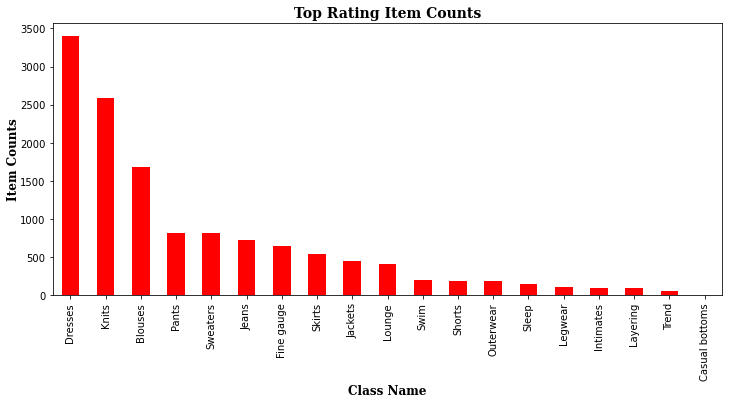

In [25]:
ax=toprating.plot(x='class_name', y='Value', kind='bar', figsize=(12, 5),color='Red')
ax.set_xlabel('Class Name',fontdict=xfont)

ax.set_ylabel('Item Counts', fontdict=yfont, labelpad=0, loc='center')

# Setting Title
ax.set_title('Top Rating Item Counts', fontdict=title_font)

plt.show()

##### The resulting bar chart visually represents the number of items in each class name category that received a top rating of 5. This visualization allows you to quickly identify which clothing categories are most popular among customers who have given top ratings. It's a powerful way to understand customer preferences and make informed decisions about inventory and marketing strategies.